In [99]:
# 抓取留言

#引入函式庫
import requests 
import json


# 超連結
url = 'https://www.google.com/maps/preview/review/listentitiesreviews?authuser=0&hl=zh-TW&gl=tw&pb=!1m2!1y3765758629526904009!2y3122492267182977036!2m1!2i10!3e1!4m5!3b1!4b1!5b1!6b1!7b1!5m2!1snpZwY-zWDsHbhwPLmarYDQ!7e81'
    
# 發送get請求
text = requests.get(url).text
# 取代掉特殊字元，這個字元是為了資訊安全而設定的喔。
pretext = ')]}\''
text = text.replace(pretext,'')

# 把字串讀取成json
soup = json.loads(text)

# 取出包含留言的List 。
conlist = soup[2]

temp = []
# 逐筆抓出
for i in conlist:
    temp.append(i[3])
df = pd.DataFrame(temp)


In [100]:
df

,0
0,從小喝到大耶～\n老闆還是同一個\n各種青草茶都是花上不少時間熬煮的\n薏仁湯也是熬煮到很濃...
1,每隔幾天就會去買一瓶 酸梅汁\n專研植物藥理背景的老闆\n用心熬煮特別濃郁的配方\n除了天天...
2,111.09.19更新：買了網推的薏仁湯，超級濃稠阿，很棒。\n\n無糖青草茶有淡淡草藥香，...
3,從大學到現在還是很愛的好味道，真材實料一喝（吃）就知道，這麼多年沒變過，雖在夜市裡，但整個攤...
4,綠豆湯太好喝了～\n喝到都快沒了才想到要拍照\n綠豆很多湯也很清甜夏天喝很降火氣\n洛神花茶...
5,從中學一路喝到現在，好滋味沒有改變過，老闆也是一直都很親切、實在，就像這家店賣的東西一樣🥰\...
6,太好喝了吧！超香的酸梅湯和桂圓紅棗湯！貨真價實！老闆超親切熱情！下次還要來喝別的～～～
7,不要再喝手搖飲了\n來師大一定要嚐嚐伯伯親手熬煮的養身茶\n各種茶飲都真材實料\n最喜桂圓紅...
8,老闆人超好\n都非常真材實料\n每次來師大夜市都會來\n必推～\n常喝青草茶跟洛神花茶\n有...
9,今天點的是減脂茶大杯\n\n這一家的茶都很健康XD\n逛夜市不要配手搖飲來古早茶坊比較養生啦...


In [101]:
type(df)

pandas.core.frame.DataFrame

In [211]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [212]:
# 確認 Jieba 功能
documents = ['哈囉你好嗎衷心感謝珍重再見期待再相逢哈囉你好嗎衷心感謝珍重再見期待再相逢找不到一句適合的話對你述說接受我接受我接受我從今以後哈囉你好嗎衷心感謝珍重再見期待再相逢哈囉你好嗎衷心感謝珍重再見期待再相逢真想要找一句會讓你心動的話語讓你接受我接受我接受我請你答應我哈囉你好嗎衷心感謝珍重再見期待再相逢']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢/哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢/找不到/一句/適合/的/話/對/你/述/說/接受/我/接受/我/接受/我/從/今以/後/哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢/哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢/真/想要/找/一句/會/讓/你/心動/的/話語/讓/你/接受/我/接受/我/接受/我/請/你/答應/我/哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢


In [213]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢/哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢/找不到/一句/適合/的/話/對/你/述/說/接受/我/接受/我/接受/我/從/今以/後/哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢/哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢/真/想要/找/一句/會/讓/你/心動/的/話語/讓/你/接受/我/接受/我/接受/我/請/你/答應/我/哈囉/你好/嗎/衷心感謝/珍重再見/期待/再/相逢


In [214]:
df['seg'] = " "
df.head()

,0,seg
0,從小喝到大耶～\n老闆還是同一個\n各種青草茶都是花上不少時間熬煮的\n薏仁湯也是熬煮到很濃...,
1,每隔幾天就會去買一瓶 酸梅汁\n專研植物藥理背景的老闆\n用心熬煮特別濃郁的配方\n除了天天...,
2,111.09.19更新：買了網推的薏仁湯，超級濃稠阿，很棒。\n\n無糖青草茶有淡淡草藥香，...,
3,從大學到現在還是很愛的好味道，真材實料一喝（吃）就知道，這麼多年沒變過，雖在夜市裡，但整個攤...,
4,綠豆湯太好喝了～\n喝到都快沒了才想到要拍照\n綠豆很多湯也很清甜夏天喝很降火氣\n洛神花茶...,


In [215]:
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in df[0]:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    seg_list = jieba.lcut(documents)
    df['seg'].iloc[index] = seg_list
    index += 1

In [216]:
df['seg']

0    [從, 小, 喝, 到, 大耶, ～, \n, 老闆, 還是, 同一, 個, \n, 各種,...
1    [每隔, 幾天, 就, 會, 去, 買, 一瓶,  , 酸梅, 汁, \n, 專研, 植物,...
2    [111.09, ., 19, 更新, ：, 買, 了, 網推, 的, 薏仁, 湯, ，, ...
3    [從大學, 到, 現在, 還是, 很, 愛的, 好味道, ，, 真材實料, 一喝, （, 吃...
4    [綠豆, 湯太, 好喝, 了, ～, \n, 喝到, 都, 快, 沒, 了, 才, 想到, ...
5    [從, 中學, 一路, 喝到, 現在, ，, 好, 滋味, 沒有, 改變過, ，, 老闆, ...
6    [太, 好喝, 了, 吧, ！, 超香, 的, 酸梅, 湯和桂圓紅, 棗湯, ！, 貨真, ...
7    [不要, 再, 喝, 手搖飲, 了, \n, 來師, 大, 一定, 要, 嚐嚐, 伯伯, 親...
8    [老闆, 人超, 好, \n, 都, 非常, 真材實料, \n, 每次, 來, 師大夜市, ...
9    [今天, 點的, 是, 減脂, 茶大杯, \n, \n, 這, 一家, 的, 茶, 都, 很...
Name: seg, dtype: object

In [217]:
allcomment = [*df['seg'][0], *df['seg'][1],*df['seg'][2], *df['seg'][3],*df['seg'][4],*df['seg'][5],*df['seg'][6],*df['seg'][7],*df['seg'][8],*df['seg'][9],] 

In [218]:
allcomment

['從',
 '小',
 '喝',
 '到',
 '大耶',
 '～',
 '\n',
 '老闆',
 '還是',
 '同一',
 '個',
 '\n',
 '各種',
 '青草',
 '茶',
 '都',
 '是',
 '花',
 '上',
 '不少',
 '時間',
 '熬',
 '煮',
 '的',
 '\n',
 '薏仁',
 '湯也',
 '是',
 '熬',
 '煮',
 '到',
 '很',
 '濃稠',
 '，',
 '而且',
 '料多',
 '滿滿',
 '一杯',
 '，',
 '超級',
 '好喝',
 '\n',
 '\n',
 '苦茶',
 'ɴ',
 'ᴛ',
 '$',
 ' ',
 '45',
 '\n',
 '好像',
 '是',
 '顧肝',
 '最強',
 '的',
 '涼',
 '茶',
 '\n',
 '我',
 '是',
 '沒',
 '有',
 '覺得',
 '很苦',
 '，',
 '反而',
 '覺得',
 '回甘超級',
 '好喝',
 '的',
 '\n',
 '\n',
 '薏仁',
 '湯',
 'ɴ',
 'ᴛ',
 '$',
 ' ',
 '40',
 '\n',
 '冰冰',
 '涼涼',
 '的',
 '好喝',
 '，',
 '微甜',
 '\n',
 '\n',
 '多種',
 '行動',
 '支付',
 '\n',
 'Line',
 ' ',
 'pay',
 '、',
 '悠遊付',
 '、',
 '街口',
 '、',
 '台灣',
 'pay',
 '每隔',
 '幾天',
 '就',
 '會',
 '去',
 '買',
 '一瓶',
 ' ',
 '酸梅',
 '汁',
 '\n',
 '專研',
 '植物',
 '藥理',
 '背景',
 '的',
 '老闆',
 '\n',
 '用心',
 '熬',
 '煮',
 '特別',
 '濃郁',
 '的',
 '配方',
 '\n',
 '除了',
 '天天',
 '喝',
 '了',
 '腸胃',
 '舒服',
 ' ',
 '心情',
 '也',
 '特別',
 '好',
 '\n',
 '本身',
 '是',
 '梅子',
 '控',
 '的',
 '我',
 '\n',
 '這是',
 '我',
 '喝過',
 '最',
 '天

In [219]:
results= pd.value_counts(allcomment)

In [220]:
results

\n     56
的      29
，      29
是      13
茶      12
       ..
從大學     1
試試      1
；       1
店家      1
❤       1
Length: 376, dtype: int64

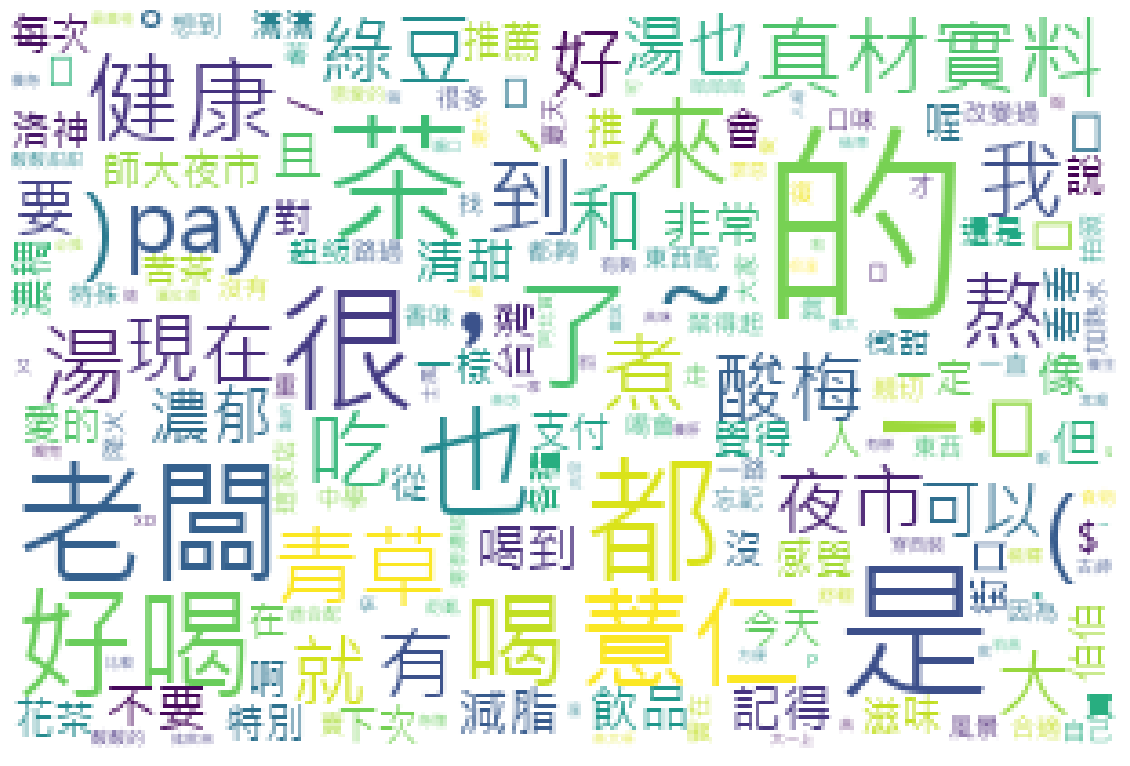

In [223]:
# 變成文字雲
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
mask = np.array(Image.open("bg.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(results)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()